In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\\Users\\lohithlikith\\Documents\\Datasets\\income predictor\\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,Low Income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,Low Income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,Low Income
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,Low Income
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,Low Income


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
object_column_names = df.dtypes[df.dtypes.values =='object'].index.tolist()
object_column_names

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [11]:
for i in object_column_names:
    print(i + ':')
    print(df[i].value_counts())
    print('-----------------------')

workclass:
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
-----------------------
education:
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
-----------------------
marital.status:
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
----------------

In [12]:
# Replace null values with NaN
df = df.replace('?', np.nan)

# For categorical columns, fill NaN with mode of column  
categorical_cols = ['occupation','workclass','native.country']         #replace [] with the categorical columns having null values.
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
for i in object_column_names:
    print(i + ':')
    print(df[i].value_counts())
    print('-----------------------')

workclass:
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
-----------------------
education:
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
-----------------------
marital.status:
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
-----------------------
occupation:
Prof-s

In [14]:
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

In [15]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [16]:
df['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

In [17]:
df['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [18]:
from sklearn.preprocessing import PowerTransformer
# selecting columns to transform
columns_to_transform = ['fnlwgt','capital.gain','capital.loss']
# Perform power transformation
pt = PowerTransformer(method='yeo-johnson',standardize = True)
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])


In [19]:
df.skew()

age               0.558743
fnlwgt            0.016902
education.num    -0.311676
capital.gain      3.016283
capital.loss      4.299587
hours.per.week    0.227643
dtype: float64

In [20]:
import numpy as np

# Define outlier threshold multiplier (consider 1.5 for standard definition)
outlier_multiplier = 1.5

for column in columns_to_transform:
    # Calculate quartiles
    q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr

    # Winsorization - Replace outliers with values at the specified quantiles
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    # Print information about outliers
    print(f"Column: {column}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Save the modified dataset (if applicable)
# df.to_csv("modified_dataset.csv", index=False)


Column: fnlwgt
IQR: 1.1966889955600828
Lower bound: -2.409673746148152
Upper bound: 2.3770822360921797
------------------------------
Column: capital.gain
IQR: 0.0
Lower bound: -0.30142547100632877
Upper bound: -0.30142547100632877
------------------------------
Column: capital.loss
IQR: 0.0
Lower bound: -0.22120963524525744
Upper bound: -0.22120963524525744
------------------------------


In [21]:
df.skew()

age               0.558743
fnlwgt           -0.134781
education.num    -0.311676
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.227643
dtype: float64

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

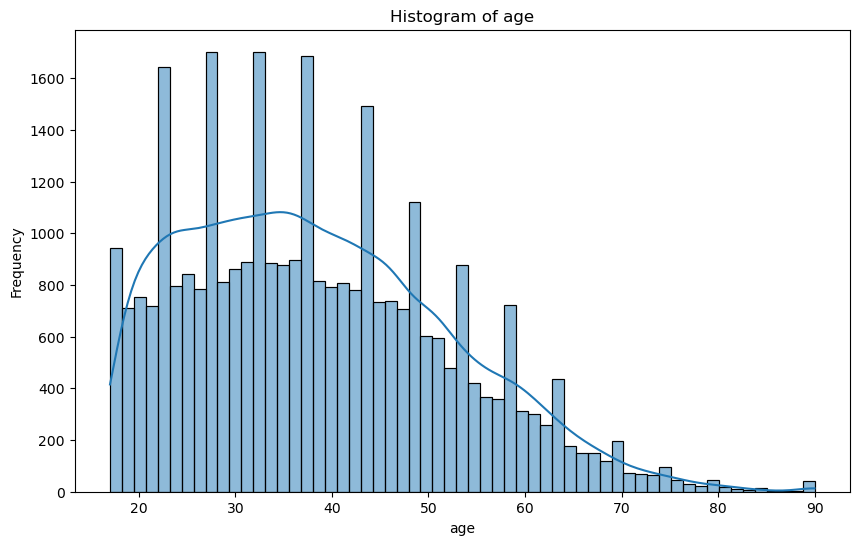

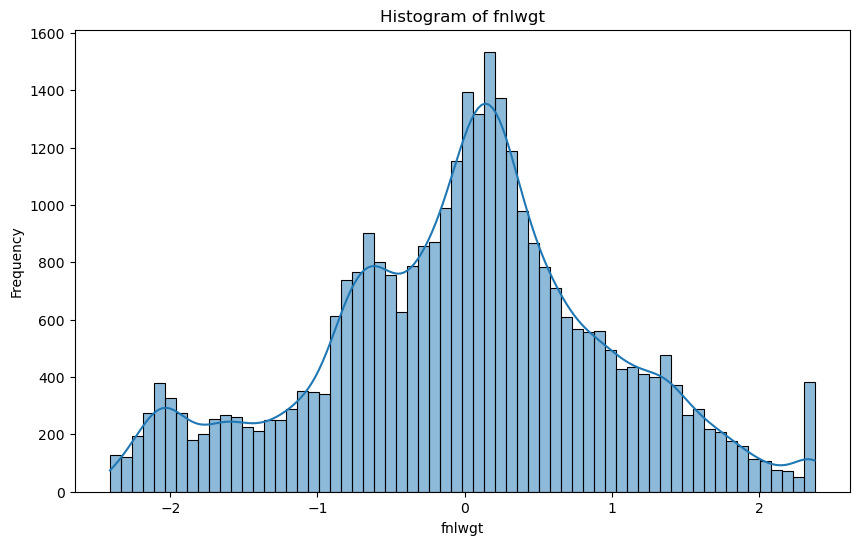

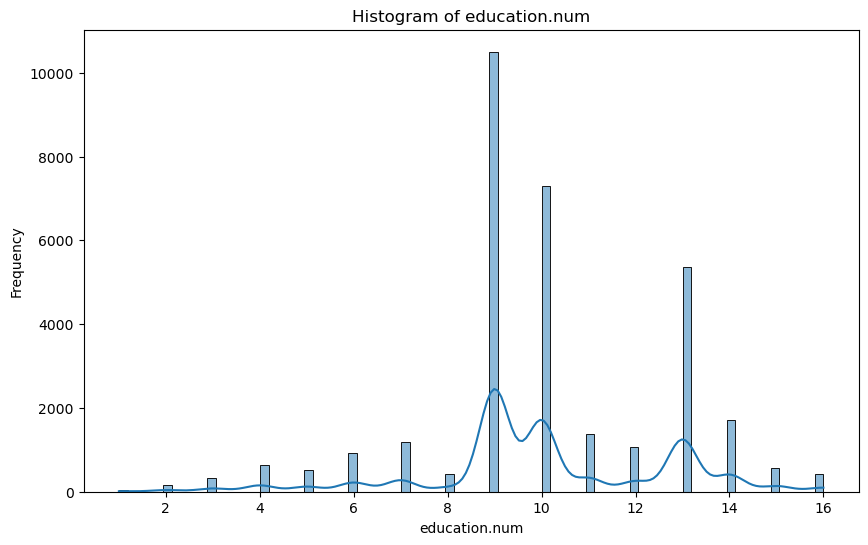

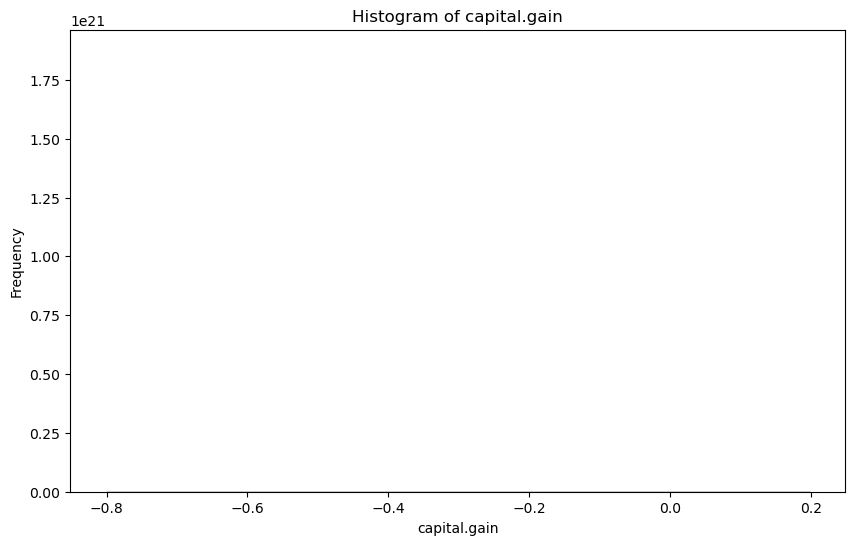

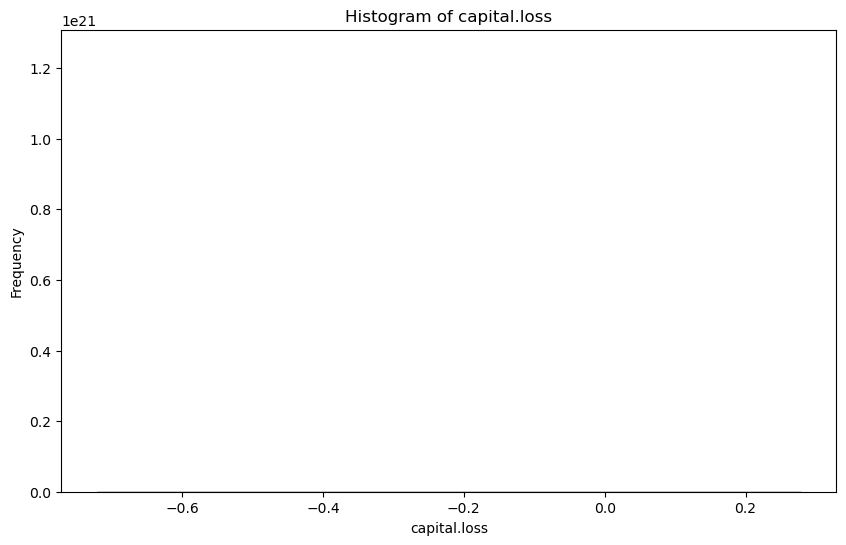

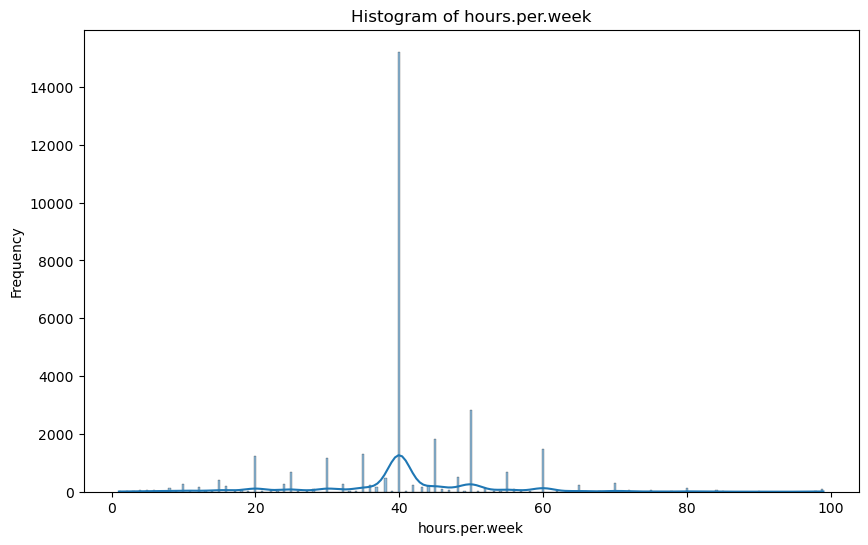

In [23]:
for col in numerical_columns:
      plt.figure(figsize=(10, 6))
      sns.histplot(df[col],kde = True)
      plt.title(f'Histogram of {col}')
      plt.xlabel(col)
      plt.ylabel('Frequency')
      plt.show()

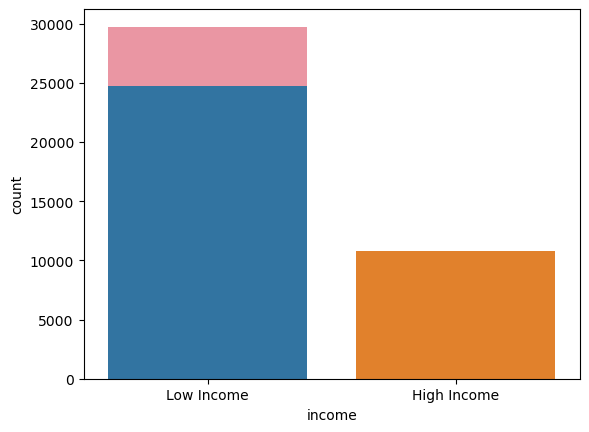

In [24]:
for col in categorical_columns:
    sns.countplot(x= col,data = df,order=df[col].value_counts().index)

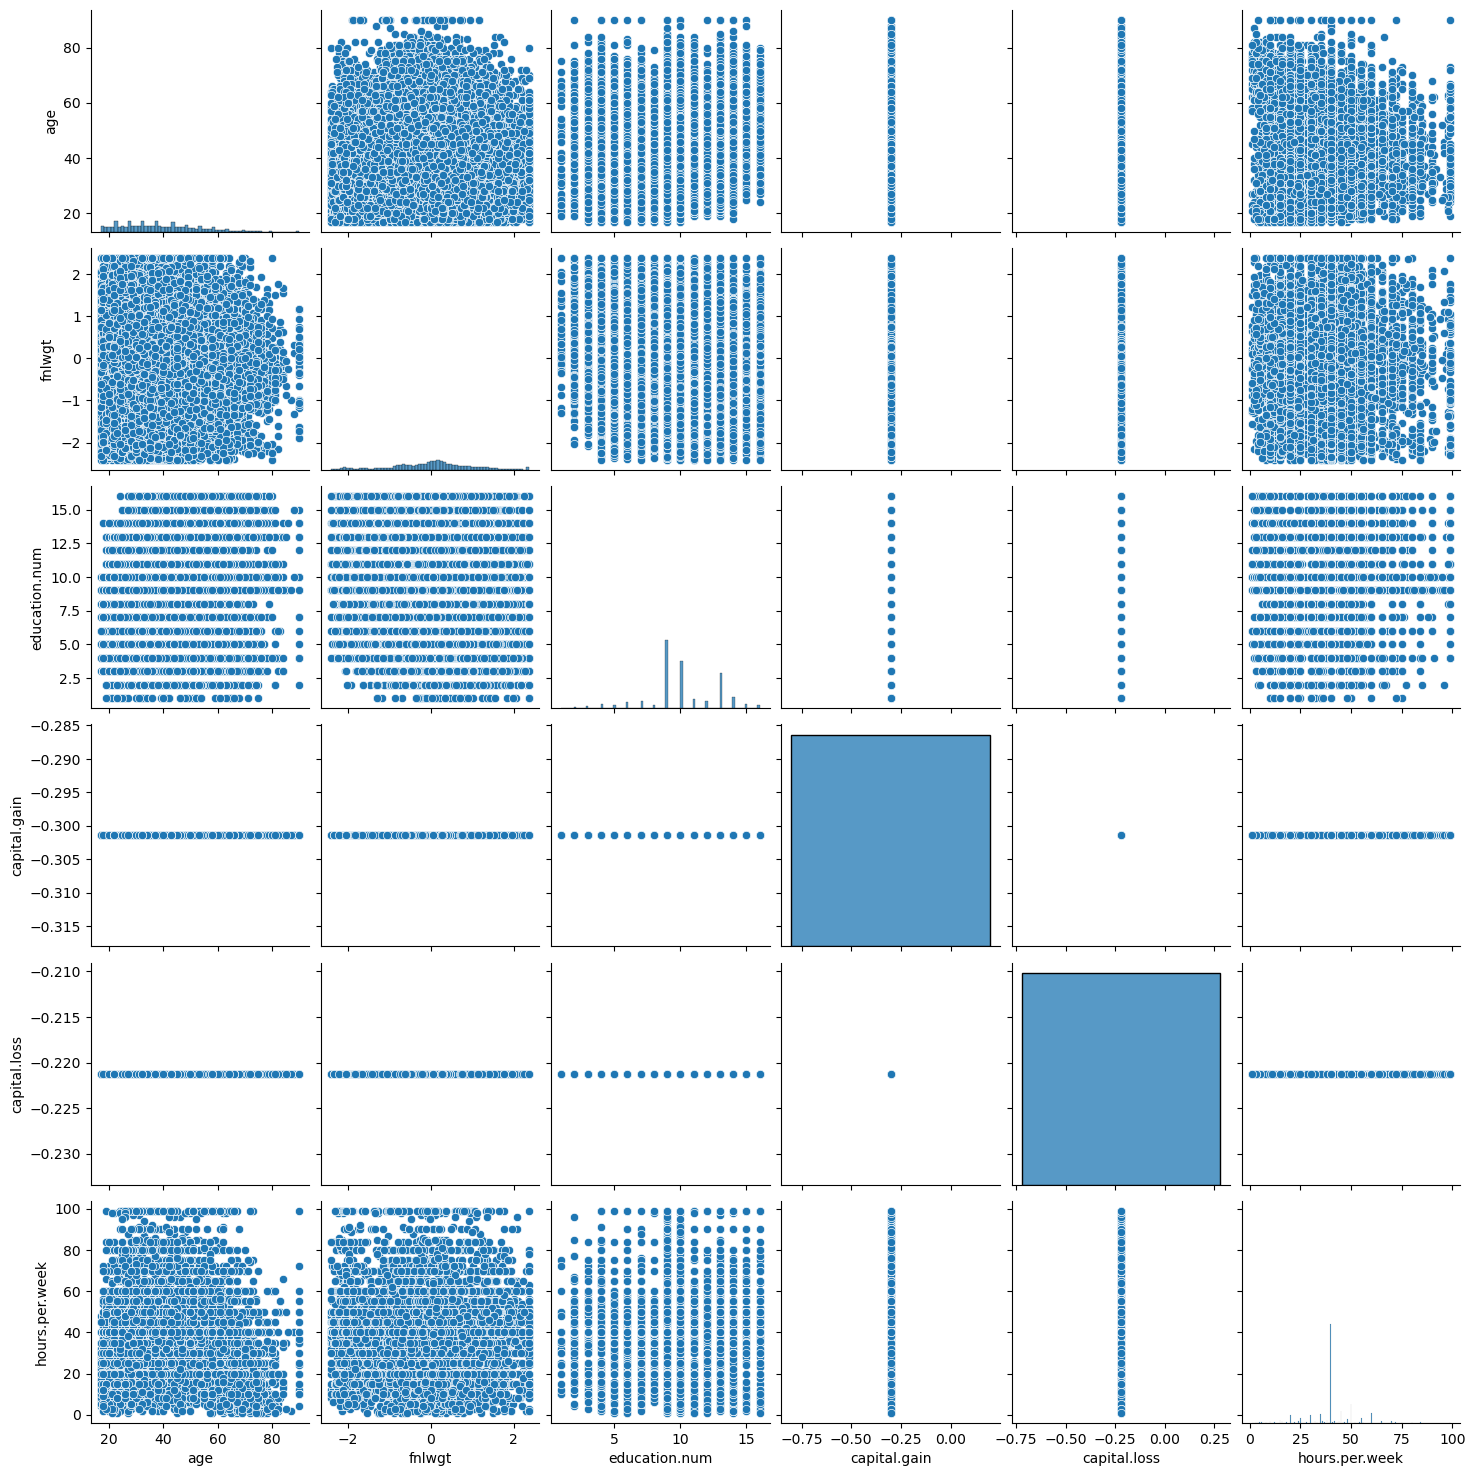

In [25]:
sns.pairplot(df)
plt.show()

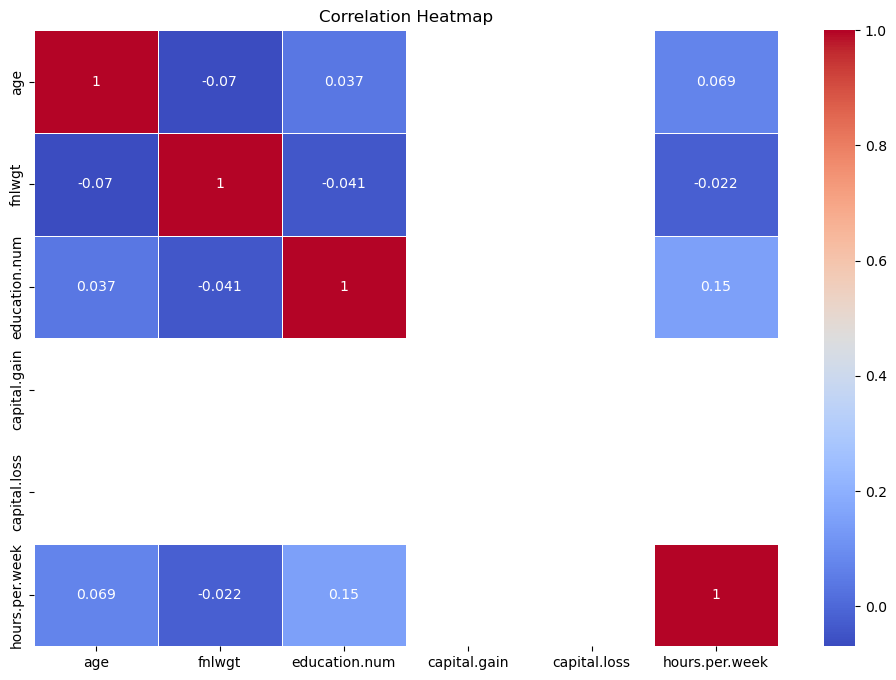

In [26]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,-1.187687,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,-0.301425,-0.22121,40,United-States,Low Income
1,82,Private,-0.433112,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,-0.301425,-0.22121,18,United-States,Low Income
2,66,Private,0.127160,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,-0.301425,-0.22121,40,United-States,Low Income
3,54,Private,-0.347181,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,-0.301425,-0.22121,40,United-States,Low Income
4,41,Private,0.804791,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,-0.301425,-0.22121,40,United-States,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,1.144059,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,-0.301425,-0.22121,40,United-States,Low Income
32557,27,Private,0.746784,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.301425,-0.22121,38,United-States,Low Income
32558,40,Private,-0.193250,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.301425,-0.22121,40,United-States,High Income
32559,58,Private,-0.219707,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.301425,-0.22121,40,United-States,Low Income


In [30]:
Data = df

x = Data.drop(columns=['income'])
y = Data[['income']]

# Separate the categorical features
categorical_cols = [col for col in x.columns if x[col].dtype == 'object']

# Perform frequency encoding
for col in categorical_cols:
    frequency = x[col].value_counts()
    mapping = dict(zip(frequency.index, range(len(frequency),0,-1)))
    Data[col] = x[col].map(mapping)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding the dependent variable 'loan_status'
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,-1.187687,16,9,3,14,5,5,1,-0.301425,-0.22121,40,41,1
1,82,8,-0.433112,16,9,3,12,5,5,1,-0.301425,-0.22121,18,41,1
2,66,8,0.127160,15,10,3,14,3,4,1,-0.301425,-0.22121,40,41,1
3,54,8,-0.347181,8,4,5,8,3,5,1,-0.301425,-0.22121,40,41,1
4,41,8,0.804791,15,10,4,14,4,5,1,-0.301425,-0.22121,40,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,8,1.144059,15,10,6,3,5,5,2,-0.301425,-0.22121,40,41,1
32557,27,8,0.746784,10,12,7,4,2,5,1,-0.301425,-0.22121,38,41,1
32558,40,8,-0.193250,16,9,7,8,6,5,2,-0.301425,-0.22121,40,41,0
32559,58,8,-0.219707,16,9,3,11,3,5,1,-0.301425,-0.22121,40,41,1


In [32]:
# Get numeric columns excluding given columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Perform t-test on pairs of numeric columns
for i in range(len(num_cols)):
  for j in range(i+1, len(num_cols)):
    col1 = df[num_cols[i]]
    col2 = df[num_cols[j]]
    
    tstat, pval = ttest_ind(col1, col2)
    
    print(f'{num_cols[i]} vs {num_cols[j]}:') 
    print(f'  t-statistic: {tstat:.3f}')
    print(f'  p-value: {pval:.3f}')

    if pval < 0.05:
      print('Columns are dependent (reject H0)')
    else:
      print('Columns are independent (fail to reject H0)')-tests


age vs workclass:
  t-statistic: 410.898
  p-value: 0.000
Columns are dependent (reject H0)
age vs fnlwgt:
  t-statistic: 509.146
  p-value: 0.000
Columns are dependent (reject H0)
age vs education:
  t-statistic: 322.515
  p-value: 0.000
Columns are dependent (reject H0)
age vs education.num:
  t-statistic: 370.501
  p-value: 0.000
Columns are dependent (reject H0)
age vs marital.status:
  t-statistic: 428.120
  p-value: 0.000
Columns are dependent (reject H0)
age vs occupation:
  t-statistic: 363.600
  p-value: 0.000
Columns are dependent (reject H0)
age vs relationship:
  t-statistic: 445.045
  p-value: 0.000
Columns are dependent (reject H0)
age vs race:
  t-statistic: 446.706
  p-value: 0.000
Columns are dependent (reject H0)
age vs sex:
  t-statistic: 488.017
  p-value: 0.000
Columns are dependent (reject H0)
age vs capital.gain:
  t-statistic: 514.377
  p-value: 0.000
Columns are dependent (reject H0)
age vs capital.loss:
  t-statistic: 513.316
  p-value: 0.000
Columns are depen

NameError: name 'tests' is not defined

In [43]:
###Chi-Square Tests
from scipy.stats import chi2_contingency
# Perform the chi-square test for each pair of categorical columns
for col1 in object_column_names:
    for col2 in object_column_names:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f'Chi-square test between {col1} and {col2}: p-value = {p}')

Chi-square test between workclass and education: p-value = 0.0
Chi-square test between workclass and marital.status: p-value = 1.0999216961023446e-217
Chi-square test between workclass and occupation: p-value = 0.0
Chi-square test between workclass and relationship: p-value = 5.078308537016692e-258
Chi-square test between workclass and race: p-value = 1.5942572261219975e-66
Chi-square test between workclass and sex: p-value = 1.0366814635199798e-139
Chi-square test between workclass and native.country: p-value = 3.3595401788614877e-10
Chi-square test between workclass and income: p-value = 3.848177814824176e-195
Chi-square test between education and workclass: p-value = 0.0
Chi-square test between education and marital.status: p-value = 1.1706731158022683e-282
Chi-square test between education and occupation: p-value = 0.0
Chi-square test between education and relationship: p-value = 0.0
Chi-square test between education and race: p-value = 5.547319569858434e-116
Chi-square test betwee

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Select the relevant columns for the models
X = df.drop(['income'], axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_cm = confusion_matrix(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_cm = confusion_matrix(y_test, tree_predictions)
tree_report = classification_report(y_test, tree_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

In [37]:
# Print the confusion matrices and classification reports
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)
print("Logistic Regression Classification Report:")
print(logistic_report)

Logistic Regression Confusion Matrix:
[[ 532 1005]
 [ 379 4597]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.35      0.43      1537
           1       0.82      0.92      0.87      4976

    accuracy                           0.79      6513
   macro avg       0.70      0.63      0.65      6513
weighted avg       0.76      0.79      0.77      6513



In [38]:
# Print the confusion matrices and classification reports
print("Decision Tree Confusion Matrix:")
print(tree_cm)
print("Decision Tree Classification Report:")
print(tree_report)



Decision Tree Confusion Matrix:
[[ 851  686]
 [ 771 4205]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1537
           1       0.86      0.85      0.85      4976

    accuracy                           0.78      6513
   macro avg       0.69      0.70      0.70      6513
weighted avg       0.78      0.78      0.78      6513



In [39]:
print("KNN Confusion Matrix:")
print(knn_cm)
print("KNN Classification Report:")
print(knn_report)

KNN Confusion Matrix:
[[ 796  741]
 [ 529 4447]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      1537
           1       0.86      0.89      0.88      4976

    accuracy                           0.81      6513
   macro avg       0.73      0.71      0.72      6513
weighted avg       0.80      0.81      0.80      6513



In [40]:
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Confusion Matrix:
[[ 854  683]
 [ 466 4510]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1537
           1       0.87      0.91      0.89      4976

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.74      6513
weighted avg       0.82      0.82      0.82      6513



In [41]:
# Get the feature importances
feature_importances = tree_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(feature, ":", importance)

Feature Importances:
age : 0.15493162960940976
workclass : 0.03713803708157095
fnlwgt : 0.24567757138803578
education : 0.014553188622621324
education.num : 0.1345917102405531
marital.status : 0.20795423674977043
occupation : 0.06053474777965524
relationship : 0.014909667494428647
race : 0.0141099055992191
sex : 0.009405608789341368
capital.gain : 0.0
capital.loss : 0.0
hours.per.week : 0.08822363285303356
native.country : 0.017970063792360838


In [42]:
import pandas as pd

# Group the data by education level and calculate the loan approval rates
approval_rates = df.groupby('occupation')['income'].apply(lambda x: (x == 'Highincome').sum() / x.count())

# Print the loan approval rates by education level
print("income by occupation:")
print(approval_rates)

income by occupation:
occupation
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: income, dtype: float64
